In [46]:
%matplotlib inline
from scipy.ndimage import sobel, gaussian_filter
from scipy import ndimage, misc
import scipy
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from PIL import Image
from time import sleep
from skimage.feature import peak_local_max
from skimage import measure

In [123]:
I = imread('checkerboard.python.png')
I = I.astype('float64')

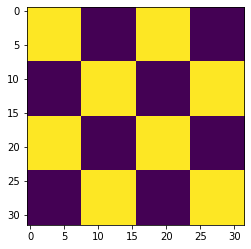

In [124]:
plt.imshow(I)

Text(0.5, 1.0, 'Sobel Y')

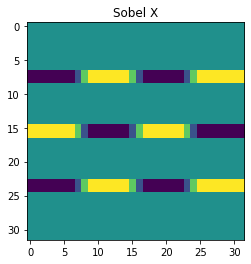

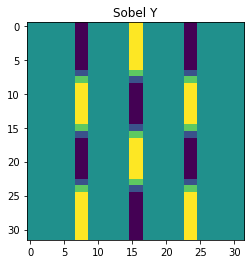

In [125]:
# Sobel filter in both axes

Ix = sobel(I, axis=0)
Iy = sobel(I, axis=1)

plt.figure()
plt.imshow(Ix); plt.title('Sobel X')

plt.figure()
plt.imshow(Iy); plt.title('Sobel Y')

In [126]:
# Matrix coeficients

M1 = np.multiply(Ix, Ix)
M2 = np.multiply(Iy, Ix)
M4 = np.multiply(Iy, Iy)

In [127]:
# Filtering scale parameter
sigma = 3
M1 = gaussian_filter(M1,sigma)
M2 = gaussian_filter(M2,sigma)
M4 = gaussian_filter(M4,sigma)

$C = det - K \cdot Trace^2$  
where $Trace = M1 + M4 $, main diagonal and $0.04 \leq K \leq 0.15$

In [128]:
K = 0.055
C = (np.multiply(M1,M4) - np.multiply(M2,M2)) - K * np.multiply((M1+M4),(M1+M4))

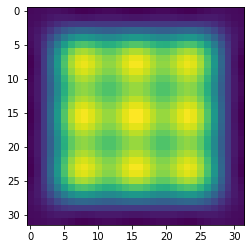

In [129]:
plt.figure()
plt.imshow(C)
#t = 0
#C[C<t] = 0
#plt.figure()
#plt.imshow(C)

<ipython-input-130-bfba8d28ee7d>:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  corners = peak_local_max(C, indices =False , min_distance=2)


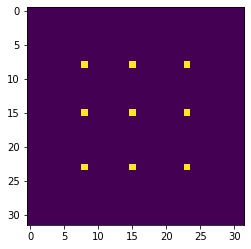

In [130]:
corners = peak_local_max(C, indices =False , min_distance=2)
plt.imshow(corners)

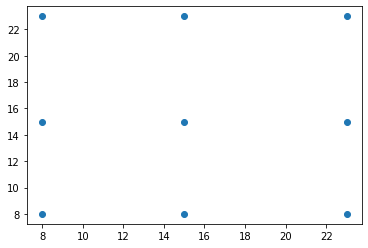

In [131]:
L = measure.label(corners)
props = measure.regionprops(L)
centers = []
for prop in props:
    centers.append(prop.centroid)

# convert into np array
centers = np.array(centers)

plt.scatter(centers[:,0], centers[:,1])

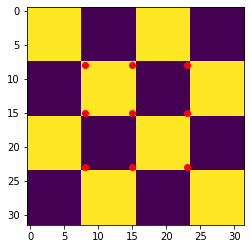

In [122]:
plt.figure()
plt.imshow(I)
plt.scatter(centers[:,0], centers[:,1], c='red')